# CSCI218 Group Assignment

## Section 3: Experimental Setup & Training configuration

---
Group: FT7

Group Members:
- Yuxiang Chen
- Marcela Fioneta
- Haoran Gao
- Zhihui Liu
- Yijia Wang
- Lorenzo Sayo Yanga

---
Roles in section:
- Primary Author: Lorenzo Sayo Yanga
- Reviewer:
- Experimentation: Lorenzo Sayo Yanga
- Visualization:
- Documentation:

**Installing and importing packages**

In [22]:
# Installing the ucimlrepo package
!pip install ucimlrepo

# Importing
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For reproductibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

**Import Adult Dataset from UC Irvine Machine Learning Repository**

Adult dataset source: https://archive.ics.uci.edu/ml/datasets/Adult

In [23]:
def import_adult_dataset():
  # fetch dataset
  adult = fetch_ucirepo(name="Adult")

  # data (as pandas dataframes)
  X = adult.data.features
  y = adult.data.targets
  return X, y

# Print some basic info about the dataset
adult = fetch_ucirepo(name="Adult")

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

# Use the defined function
X, y = import_adult_dataset()

# combine to a single df, so that it's easier to do cleaning
df_combined = pd.concat([X, y], axis=1)
df_combined.head()

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Checking Dataset's missing values

In [24]:
# Check for any missing data in df
print("No. of rows:", len(df_combined))
print("\nRows with missing values")
print(df_combined.isna().sum())

No. of rows: 48842

Rows with missing values
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


Worst-case scenario is that ~4.6% of the dataset has null values.

We clean the data by dropping the rows with null values.

Should be noted that we could be introducing bias into the dataset by doing this (may need to check).

In [25]:
df_cleaned = df_combined.dropna()

# Check again after cleaning
print("AFTER CLEANING")
print("No. of rows:", len(df_cleaned))
print("\nRows with missing values")
print(df_cleaned.isna().sum())

AFTER CLEANING
No. of rows: 47621

Rows with missing values
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Split dataset to 60/20/20 (training, validation, testing)

In [26]:
def split_dataset(X, Y):
  # splitting data
  # first split to 60%(train) and 40%(non-training)
  X_train, X_other, Y_train, Y_other = train_test_split(
    X, Y,
    test_size = 0.4,
    random_state = RANDOM_STATE,
    stratify = Y
  )

  # second split to get 20%(validation) and 20%(testing)
  X_val, X_test, Y_val, Y_test = train_test_split(
    X_other, Y_other,
    test_size = 0.5,
    random_state = RANDOM_STATE,
    stratify = Y_other # keeps class proportions similar
  )
  return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [27]:
# Combine everything above to generate a new (but same) set of X_train, val, test, etc. for testing on each model.

def generate_splitted_datasets():
  X, Y = import_adult_dataset()
  X_train, Y_train, X_val, Y_val, X_test, Y_test = split_dataset(X, Y)
  return X_train, Y_train, X_val, Y_val, X_test, Y_test

Use scikit-learn's default implementations of the models

*need to confirm if these are the correct models.

`sklearn.linear_model.LogisticRegression` for Logistic Regressor,
`sklearn
`sklearn.ensemble.RandomForestClassifier` for Random Forest.

**Code to set up and run Random Forest**

Unify the labels

In [28]:

df_cleaned["income"] = df_cleaned["income"].astype(str).str.strip().str.replace(".", "", regex=False)

# Construct 0/1 labels
Y = (df_cleaned["income"] == ">50K").astype(int)
X = df_cleaned.drop("income", axis=1)

# One-hot encoding
X_encoded = pd.get_dummies(X)




/tmp/ipython-input-2502047527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["income"] = df_cleaned["income"].astype(str).str.strip().str.replace(".", "", regex=False)


Data partitioning

In [29]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = split_dataset(X_encoded, Y)


Training Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

Evaluation function

In [31]:
def evaluate_rf(split_name, X, y):
    proba = rf_model.predict_proba(X)[:, 1]
    pred = (proba >= 0.5).astype(int)

    return {
        "split": split_name,
        "accuracy": accuracy_score(y, pred),
        "precision": precision_score(y, pred, zero_division=0),
        "recall": recall_score(y, pred, zero_division=0),
        "f1": f1_score(y, pred, zero_division=0),
        "roc_auc": roc_auc_score(y, proba)
    }, pred, proba


val_metrics, y_val_pred, y_val_proba = evaluate_rf("validation", X_val, Y_val)
test_metrics, y_test_pred, y_test_proba = evaluate_rf("test", X_test, Y_test)

metrics_df = pd.DataFrame([val_metrics, test_metrics])
print(metrics_df)


        split  accuracy  precision    recall        f1   roc_auc
0  validation  0.853948   0.740935  0.610919  0.669675  0.904308
1        test  0.853543   0.728958  0.630143  0.675958  0.903986


Confusion Matrix (Test)

<Figure size 640x480 with 0 Axes>

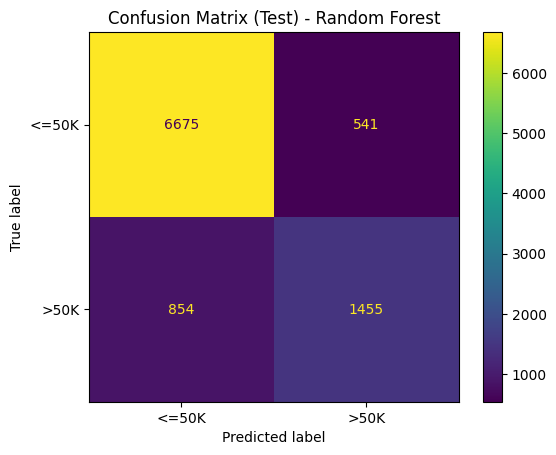

In [32]:
plt.figure()
ConfusionMatrixDisplay.from_predictions(
    Y_test,
    y_test_pred,
    display_labels=["<=50K", ">50K"],
    values_format="d"
)
plt.title("Confusion Matrix (Test) - Random Forest")
plt.show()


ROC Curve (Test)

<Figure size 640x480 with 0 Axes>

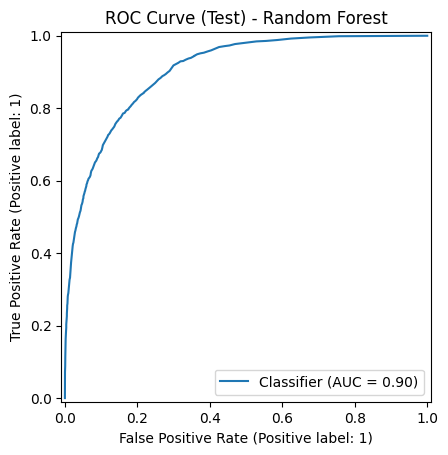

In [33]:

plt.figure()
RocCurveDisplay.from_predictions(Y_test, y_test_proba)
plt.title("ROC Curve (Test) - Random Forest")
plt.show()


Feature Importance

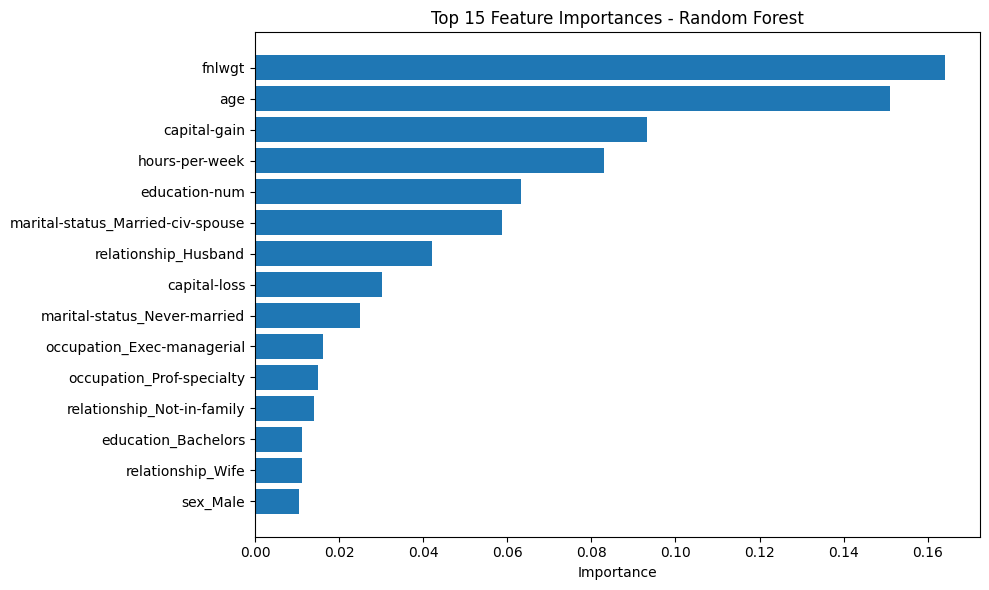

In [34]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

top_features = feature_importance.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features.index[::-1], top_features.values[::-1])
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

**Evaluation Metrics & Analysis Methods**

The performance of the Random Forest classifier was evaluated using multiple classification metrics to ensure a comprehensive assessment of model effectiveness. Since the Adult dataset is a binary classification problem with class imbalance (fewer individuals earning more than 50K), relying on accuracy alone is insufficient. Therefore, several complementary metrics were used.

Accuracy measures the overall proportion of correctly classified instances. While it provides a general indication of performance, it does not distinguish between types of classification errors.

Precision evaluates the reliability of positive predictions (income >50K). It measures the proportion of correctly predicted high-income individuals among all instances predicted as high-income. This is important when false positives should be minimized.

Recall measures the model’s ability to correctly identify actual high-income individuals. It reflects how many true >50K cases are successfully detected. In imbalanced datasets, recall helps assess whether the model misses too many positive cases.

F1-score represents the harmonic mean of precision and recall. It provides a balanced metric when there is a trade-off between identifying high-income individuals and avoiding false alarms.

ROC AUC (Area Under the Receiver Operating Characteristic Curve) evaluates the model’s ability to discriminate between the two classes across all possible classification thresholds. A higher ROC AUC indicates better separability between income classes and stronger overall classification capability.

In addition to numerical metrics, a Confusion Matrix was used to visualize classification outcomes, showing true positives, true negatives, false positives, and false negatives. This helps interpret the types of errors made by the model.

Furthermore, feature importance values were extracted from the Random Forest model to analyze which variables contributed most to prediction decisions. Unlike linear models that provide coefficient direction, Random Forest importance scores indicate the relative contribution of each feature to decision-making across multiple trees.

By combining multiple evaluation metrics and visual analysis methods, the performance of the Random Forest model was assessed comprehensively in terms of accuracy, discrimination ability, robustness, and interpretability.